In [2]:
import pandas as pd #
import numpy as np
from joblib import load
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
import seaborn as sns

crit_thresh = -0.097692
warn_thresh = -0.045423

# Load Isolation Forest model and scaler
scaler = load('./model/iso_scaler2.joblib')
iso_model = load('./model/iso_model2.joblib')

# Load datasets
#df_val = pd.read_csv("./data/validate.csv")
df_val = pd.read_csv("./../../data/final_moving_avg_devID109_rain_1_hour.csv")
#df_val = df_val[df_val['devID'] == 103]
#df1 = pd.read_csv("./data/dev101_prepared.csv")
#df2 = pd.read_csv("./data/dev102_prepared.csv")

#df_val = pd.concat([df1, df2], ignore_index=True)
df_val 

,Timestamp,devID,Temp,hum,soil,rain,geo,rain_ma_1h,label,rain_ma_6h,rain_ma_12h,rain_ma_24h,soil_ma_4h,soil_ma_8h,soil_ma_12h,soil_ma_16h,geo_ma_2min,geo_ma_4min,geo_ma_6min,geo_ma_8min
0,11/4/2025 4:40,Node 109,34.20,64.70,27.1,0.00,3.73,0.000000,NaN,0.000000,0.000000,0.000000,27.100000,27.100000,27.100000,27.100000,3.730000,3.730000,3.730000,3.730000
1,11/4/2025 4:40,Node 109,34.40,62.20,27.1,0.00,0.30,0.000000,NaN,0.000000,0.000000,0.000000,27.100000,27.100000,27.100000,27.100000,2.015000,2.015000,2.015000,2.015000
2,11/4/2025 4:42,Node 109,34.50,60.05,27.1,0.00,2.01,0.000000,NaN,0.000000,0.000000,0.000000,27.100000,27.100000,27.100000,27.100000,2.010000,2.013333,2.013333,2.013333
3,11/4/2025 4:43,Node 109,34.60,59.40,27.1,0.00,0.41,0.000000,NaN,0.000000,0.000000,0.000000,27.100000,27.100000,27.100000,27.100000,1.210000,1.612500,1.612500,1.612500
4,11/4/2025 4:43,Node 109,34.60,58.05,27.1,0.00,0.38,0.000000,NaN,0.000000,0.000000,0.000000,27.100000,27.100000,27.100000,27.100000,0.933333,1.366000,1.366000,1.366000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18577,11/17/2025 18:21,Node 109,23.80,97.95,41.9,0.28,0.54,0.240563,NaN,3.170836,1.699166,0.850609,43.076996,40.988889,38.497883,37.406198,0.415000,0.382000,0.366667,0.384444
18578,11/17/2025 18:21,Node 109,23.80,98.00,41.9,0.28,3.74,0.241111,NaN,3.163307,1.697400,0.850255,43.072538,40.990661,38.502114,37.410351,1.523333,0.941667,0.848571,0.720000
18579,11/17/2025 18:22,Node 109,23.80,98.00,41.9,0.28,3.74,0.241644,NaN,3.131462,1.699863,0.849901,43.055871,41.005837,38.517061,37.417375,2.673333,1.740000,1.341429,1.052000
18580,11/17/2025 18:23,Node 109,23.80,98.00,41.9,0.28,0.47,0.230137,NaN,3.111775,1.700212,0.850074,43.026806,41.034503,38.526775,37.427290,2.105000,1.756000,1.232500,1.127778


In [4]:
df = df_val.sort_values('Timestamp').reset_index(drop=True)

In [5]:
df_val

,Timestamp,devID,Temp,hum,soil,rain,geo,rain_ma_1h,label,rain_ma_6h,rain_ma_12h,rain_ma_24h,soil_ma_4h,soil_ma_8h,soil_ma_12h,soil_ma_16h,geo_ma_2min,geo_ma_4min,geo_ma_6min,geo_ma_8min
0,11/4/2025 4:40,Node 109,34.20,64.70,27.1,0.00,3.73,0.000000,NaN,0.000000,0.000000,0.000000,27.100000,27.100000,27.100000,27.100000,3.730000,3.730000,3.730000,3.730000
1,11/4/2025 4:40,Node 109,34.40,62.20,27.1,0.00,0.30,0.000000,NaN,0.000000,0.000000,0.000000,27.100000,27.100000,27.100000,27.100000,2.015000,2.015000,2.015000,2.015000
2,11/4/2025 4:42,Node 109,34.50,60.05,27.1,0.00,2.01,0.000000,NaN,0.000000,0.000000,0.000000,27.100000,27.100000,27.100000,27.100000,2.010000,2.013333,2.013333,2.013333
3,11/4/2025 4:43,Node 109,34.60,59.40,27.1,0.00,0.41,0.000000,NaN,0.000000,0.000000,0.000000,27.100000,27.100000,27.100000,27.100000,1.210000,1.612500,1.612500,1.612500
4,11/4/2025 4:43,Node 109,34.60,58.05,27.1,0.00,0.38,0.000000,NaN,0.000000,0.000000,0.000000,27.100000,27.100000,27.100000,27.100000,0.933333,1.366000,1.366000,1.366000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18577,11/17/2025 18:21,Node 109,23.80,97.95,41.9,0.28,0.54,0.240563,NaN,3.170836,1.699166,0.850609,43.076996,40.988889,38.497883,37.406198,0.415000,0.382000,0.366667,0.384444
18578,11/17/2025 18:21,Node 109,23.80,98.00,41.9,0.28,3.74,0.241111,NaN,3.163307,1.697400,0.850255,43.072538,40.990661,38.502114,37.410351,1.523333,0.941667,0.848571,0.720000
18579,11/17/2025 18:22,Node 109,23.80,98.00,41.9,0.28,3.74,0.241644,NaN,3.131462,1.699863,0.849901,43.055871,41.005837,38.517061,37.417375,2.673333,1.740000,1.341429,1.052000
18580,11/17/2025 18:23,Node 109,23.80,98.00,41.9,0.28,0.47,0.230137,NaN,3.111775,1.700212,0.850074,43.026806,41.034503,38.526775,37.427290,2.105000,1.756000,1.232500,1.127778


In [6]:
#df_val  = pd.concat([df1, df2], ignore_index=True)
df_val.describe()

,Temp,hum,soil,rain,geo,rain_ma_1h,rain_ma_6h,rain_ma_12h,rain_ma_24h,soil_ma_4h,soil_ma_8h,soil_ma_12h,soil_ma_16h,geo_ma_2min,geo_ma_4min,geo_ma_6min,geo_ma_8min
count,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000,18582.000000
mean,26.904913,85.129362,32.637526,0.242351,3.839214,0.237572,0.221831,0.185373,0.170821,32.550340,32.430625,32.348128,32.286151,3.845150,3.842665,3.842926,3.840451
std,3.829622,12.329334,3.924209,1.873470,7.161649,1.439573,0.871201,0.567250,0.374355,3.804099,3.617865,3.530699,3.478607,5.991974,4.860702,4.372493,4.051994
min,21.400000,44.100000,26.600000,0.000000,-84.350000,0.000000,0.000000,0.000000,0.000000,26.614355,26.650347,26.650347,26.669313,-41.085000,-15.964000,-9.130000,-6.222000
25%,23.900000,75.600000,29.900000,0.000000,0.370000,0.000000,0.000000,0.000000,0.000000,29.788374,30.033969,30.163850,30.312339,0.425000,0.572000,0.785179,1.034659
50%,25.300000,91.600000,33.700000,0.000000,0.530000,0.000000,0.000000,0.000000,0.009726,33.497959,33.170797,33.045469,32.710813,0.933333,1.704000,2.017143,2.295000
75%,30.100000,94.350000,34.800000,0.000000,3.720000,0.000000,0.010120,0.024138,0.049530,34.800600,34.805567,34.781173,34.844071,4.379167,5.387875,5.693527,5.435889
max,38.100000,98.300000,46.600000,33.950000,127.490000,22.036379,6.400288,2.805758,1.322692,44.101025,41.049708,39.935466,39.075402,97.460000,53.306000,40.494286,29.594000


## Threshold

In [5]:
#def rule_based_risk(row):
#   score = 0
#   
#   # Rainfall (mm/h)
#   if row['rain'] > 25:
#       score += 2
#   elif row['rain'] > 10:
#       score += 1
#
#   # Soil moisture (%)
#   if row['soil'] > 60:
#       score += 2
#   elif row['soil'] > 45:
#       score += 1
#
#   # Temperature (°C)
#   if row['temp'] < 27:
#       score += 2
#   elif row['temp'] < 32:
#       score += 1
#
#   # Humidity (%)
#   if row['humi'] > 80:
#       score += 2
#   elif row['humi'] > 65:
#       score += 1
#
#   # Geophone (Hz)
#   if row['geo'] > 25:
#       score += 1
#   elif row['geo'] > 10:
#       score += 0.5
#
#   if score >= 6:
#       return "Critical"
#   elif score >= 3:
#       return "Warning"
#   else:
#       return "Normal"
#
#feature_cols = ['soil', 'rain', 'temp', 'humi', 'geo']
#X_val = df_val[feature_cols].values
#X_val_scaled = scaler.transform(X_val)
#
#df_val['anomaly_score'] = iso_model.decision_function(X_val_scaled)
#
#crit_thresh = np.percentile(df_val['anomaly_score'], 0.5)
#warn_thresh = np.percentile(df_val['anomaly_score'], 5)
#
#def model_based_risk(score):
#   if score < crit_thresh:
#       return "Critical"
#   elif score < warn_thresh:
#       return "Warning"
#   else:
#       return "Normal"
#
#df_val['model_risk'] = df_val['anomaly_score'].apply(model_based_risk)
#df_val['rule_risk'] = df_val.apply(rule_based_risk, axis=1)
#
#risk_levels = {'Normal': 0, 'Warning': 1, 'Critical': 2}
#
#def combine_weighted_risks(model_risk, rule_risk, w_model=0.6, w_rule=0.4):
#   score = w_model * risk_levels[model_risk] + w_rule * risk_levels[rule_risk]
#   
#   if score >= 1.5:
#       return "Critical"
#   elif score >= 0.5:
#       return "Warning"
#   else:
#       return "Normal"
#
#df_val['predicted_risk'] = df_val.apply(
#    lambda row: combine_weighted_risks(row['model_risk'], row['rule_risk']),
#    axis=1
#)
#
#print(df_val[['soil', 'rain', 'temp', 'humi', 'geo',
#              'anomaly_score', 'model_risk', 'rule_risk', 'predicted_risk']].head())

In [8]:
# สร้าง features
feature_cols = ['soil', 'rain', 'Temp', 'hum', 'geo']
X_val = df_val[feature_cols].values
X_val_scaled = scaler.transform(X_val)

# คำนวณ anomaly score และจัดระดับความเสี่ยง
df_val['anomaly_score'] = iso_model.decision_function(X_val_scaled)


#crit_thresh = np.percentile(df_val['anomaly_score'], 0.25)
#warn_thresh = np.percentile(df_val['anomaly_score'], 0.75)
#crit_thresh = -0.094870
#warn_thresh = -0.042534

def classify_risk(score):
    if score < crit_thresh:
        return "Critical"
    elif score < warn_thresh:
        return "Warning"
    else:
        return "Normal"

df_val['predicted_risk'] = df_val['anomaly_score'].apply(classify_risk)

In [9]:
#print("crit_thresh:", np.percentile(df_val['anomaly_score'], 0.433))
#print("warn_thresh:", np.percentile(df_val['anomaly_score'], 2.226))

In [10]:
critical_group = df_val[df_val['anomaly_score'] < crit_thresh]
print("critical_group")
print(critical_group[feature_cols].describe())

critical_group
             soil        rain        Temp         hum         geo
count  228.000000  228.000000  228.000000  228.000000  228.000000
mean    40.806360   13.035307   24.480702   96.302193   19.449956
std      5.269212    9.779835    1.481858    4.984414    9.403507
min     27.000000    0.000000   23.400000   46.600000    0.230000
25%     41.000000    6.710000   23.700000   97.000000   16.277500
50%     42.400000    7.820000   24.300000   97.500000   21.255000
75%     44.000000   21.020000   24.625000   97.700000   26.230000
max     46.600000   33.950000   37.500000   98.000000   42.240000


In [11]:
warn_group = df_val[(df_val['anomaly_score'] < warn_thresh) & (df_val['anomaly_score'] >= crit_thresh) ]
print("warn_group")
print(warn_group[feature_cols].describe())

warn_group
             soil        rain        Temp         hum         geo
count  376.000000  376.000000  376.000000  376.000000  376.000000
mean    33.136569    2.831277   25.605984   92.314229   16.207128
std      4.954389    2.483159    2.859596   10.443932   14.554717
min     26.800000    0.000000   21.500000   44.600000    0.000000
25%     30.000000    0.000000   24.350000   92.800000    0.530000
50%     32.100000    3.070000   25.200000   94.975000   18.155000
75%     34.800000    4.750000   25.700000   96.600000   29.805000
max     44.300000    8.240000   37.800000   98.100000  127.490000


In [12]:
normal_group = df_val[df_val['anomaly_score'] >= warn_thresh]
print("normal_group")
print(normal_group[feature_cols].describe())

normal_group
               soil          rain          Temp           hum           geo
count  17978.000000  17978.000000  17978.000000  17978.000000  17978.000000
mean      32.523490      0.025962     26.962824     84.837398      3.382568
std        3.766916      0.169605      3.853216     12.320010      6.401425
min       26.600000      0.000000     21.400000     44.100000    -84.350000
25%       29.700000      0.000000     23.900000     75.000000      0.370000
50%       33.700000      0.000000     25.400000     91.400000      0.520000
75%       34.800000      0.000000     30.200000     94.200000      2.637500
max       46.200000      3.630000     38.100000     98.300000     51.170000


C:\Users\ahmad\AppData\Local\Temp\ipykernel_10040\2053204387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_val, x='predicted_risk', order=['Normal', 'Warning', 'Critical'], palette='Set2')


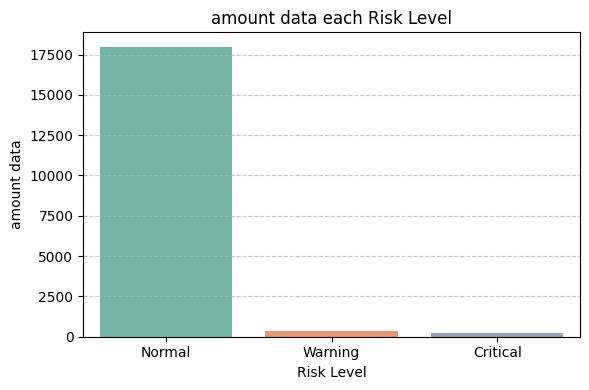

In [13]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df_val, x='predicted_risk', order=['Normal', 'Warning', 'Critical'], palette='Set2')

plt.title('amount data each Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('amount data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Distribution of Anomaly Scores

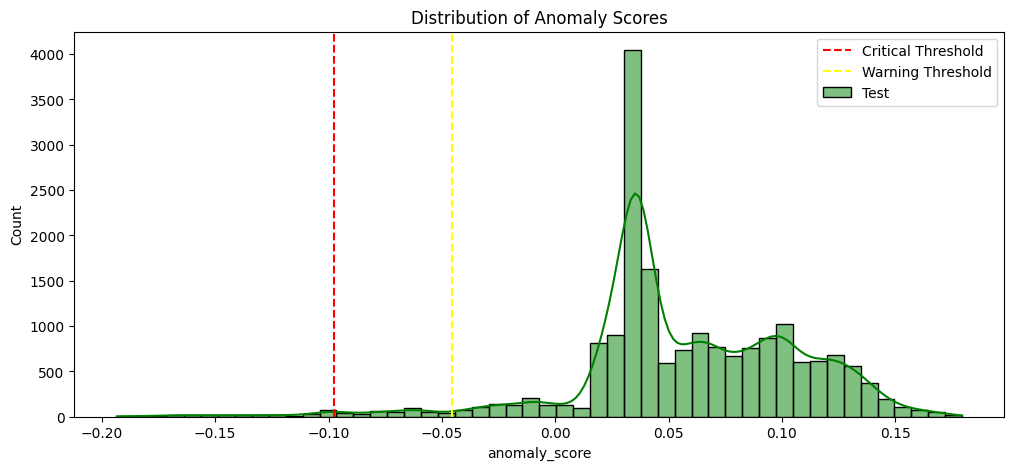

In [14]:
plt.figure(figsize=(12,5))
sns.histplot(df_val['anomaly_score'], bins=50, kde=True, color='green', label='Test')
plt.axvline(crit_thresh, color='red', linestyle='--', label='Critical Threshold')
plt.axvline(warn_thresh, color='yellow', linestyle='--', label='Warning Threshold')
plt.legend()
plt.title('Distribution of Anomaly Scores')
plt.show()



## Z-score Outlier

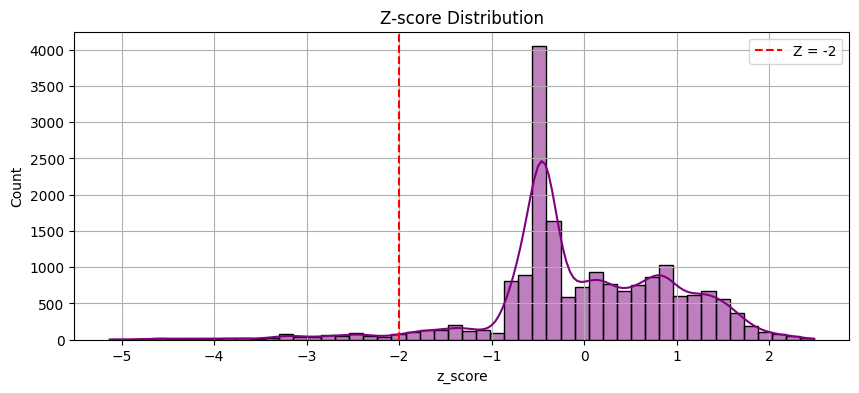

In [15]:
# ==== Z-score Outlier ====

mean_score = df_val['anomaly_score'].mean()
std_score = df_val['anomaly_score'].std()
df_val['z_score'] = (df_val['anomaly_score'] - mean_score) / std_score
df_val['z_outlier'] = df_val['z_score'].apply(lambda z: 'Anomaly' if z < -2 else 'Normal')

plt.figure(figsize=(10,4))
sns.histplot(df_val['z_score'], kde=True, bins=50, color='purple')
plt.axvline(-2, color='red', linestyle='--', label='Z = -2')
plt.title("Z-score Distribution")
plt.legend()
plt.grid(True)
plt.show()

## Mahalanobis Distance

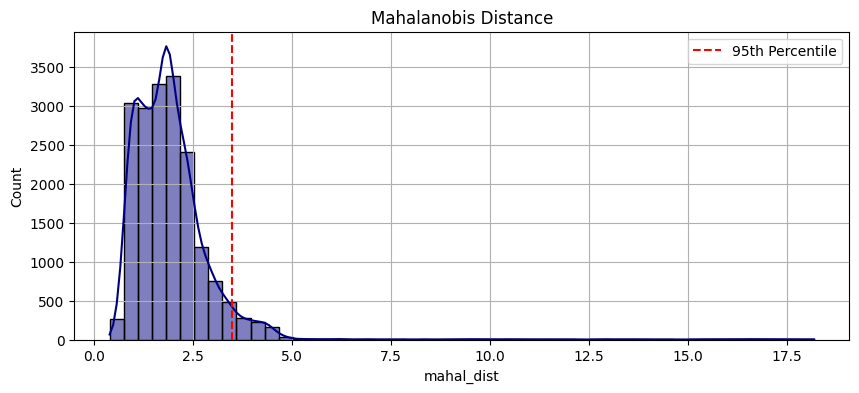

In [16]:
mean_vec = np.mean(X_val_scaled, axis=0)
cov_matrix = np.cov(X_val_scaled, rowvar=False)
inv_covmat = np.linalg.inv(cov_matrix)

df_val['mahal_dist'] = [mahalanobis(x, mean_vec, inv_covmat) for x in X_val_scaled]
mahal_thresh = np.percentile(df_val['mahal_dist'], 95)
df_val['mahal_outlier'] = df_val['mahal_dist'].apply(lambda d: 'Anomaly' if d > mahal_thresh else 'Normal')

plt.figure(figsize=(10,4))
sns.histplot(df_val['mahal_dist'], bins=50, kde=True, color='navy')
plt.axvline(mahal_thresh, color='red', linestyle='--', label='95th Percentile')
plt.title("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()

## Percentile Threshold 5%

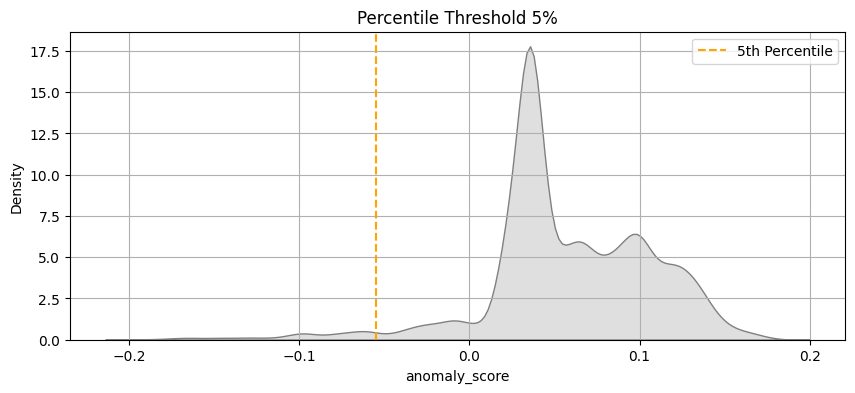

In [17]:
percentile = np.percentile(df_val['anomaly_score'], 3)
df_val['percentile_outlier'] = df_val['anomaly_score'].apply(lambda s: 'Anomaly' if s < percentile else 'Normal')

plt.figure(figsize=(10,4))
sns.kdeplot(df_val['anomaly_score'], fill=True, color='gray')
plt.axvline(percentile, color='orange', linestyle='--', label='5th Percentile')
plt.title("Percentile Threshold 5%")
plt.legend()
plt.grid(True)
plt.show()

## PCA

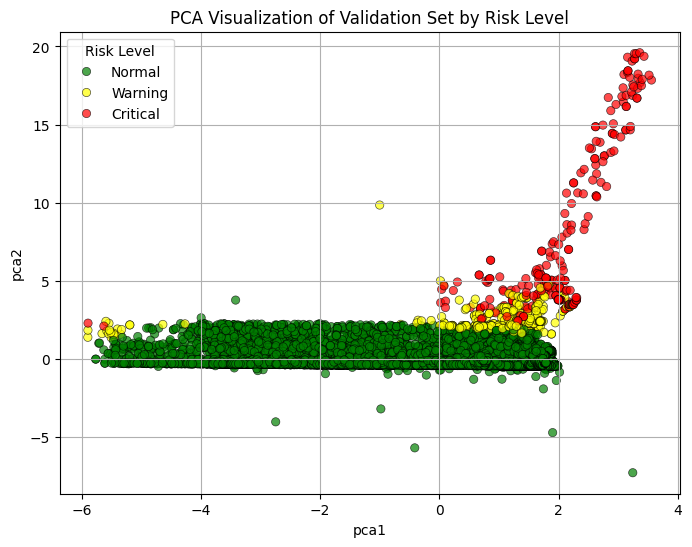

In [18]:
# Fit PCA
pca = PCA(n_components=2)
X_val_pca = pca.fit_transform(X_val_scaled)

# เพิ่มค่า PCA กลับเข้า df_val
df_val['pca1'] = X_val_pca[:, 0]
df_val['pca2'] = X_val_pca[:, 1]

# Map สีแบบกำหนดเอง
custom_palette = {
    'Normal': 'green',
    'Warning': 'yellow',
    'Critical': 'red'
}

# วาดกราฟ
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_val,
    x='pca1', y='pca2',
    hue='predicted_risk',
    palette=custom_palette,
    alpha=0.7,
    edgecolor='black'
)
plt.title('PCA Visualization of Validation Set by Risk Level')
plt.grid(True)
plt.legend(title='Risk Level')
plt.show()

In [19]:
explained_var = pca.explained_variance_ratio_
print(f"PCA explain {explained_var[0]*100:.2f}% and {explained_var[1]*100:.2f}% of data")


PCA explain 55.48% and 26.21% of data


In [20]:
# ดูว่าแต่ละ feature มีน้ำหนักกับแต่ละ principal component เท่าไหร่ x=PC1 y=PC2
pca_df = pd.DataFrame(pca.components_, columns=feature_cols, index=["PC1", "PC2"])
print(pca_df.T.sort_values("PC1", ascending=False))  # เรียงตามผลต่อแกน X


           PC1       PC2
hum   0.752253 -0.000012
rain  0.098796  0.840378
soil  0.016644  0.056100
geo  -0.111012  0.537763
Temp -0.641681  0.037796


## Summary Statistics

In [21]:
print("\n== Z-score Outlier ==")
print(df_val['z_outlier'].value_counts())


== Z-score Outlier ==
z_outlier
Normal     17940
Anomaly      642
Name: count, dtype: int64


In [22]:
print("\n== Percentile Outlier ==")
print(f"5th Percentile Threshold: {percentile:.4f}")
print(df_val['percentile_outlier'].value_counts())


== Percentile Outlier ==
5th Percentile Threshold: -0.0549
percentile_outlier
Normal     18024
Anomaly      558
Name: count, dtype: int64


In [23]:
print("\n== Mahalanobis Outlier ==")
print(f"95th Percentile of Mahalanobis Distance: {mahal_thresh:.2f}")
print(df_val['mahal_outlier'].value_counts())


== Mahalanobis Outlier ==
95th Percentile of Mahalanobis Distance: 3.47
mahal_outlier
Normal     17653
Anomaly      929
Name: count, dtype: int64


In [24]:
overlap = df_val[
    (df_val['z_outlier'] == 'Anomaly') &
    (df_val['percentile_outlier'] == 'Anomaly') &
    (df_val['mahal_outlier'] == 'Anomaly')
]
print(f"Anomalies detected by ALL 3 methods: {len(overlap)}")


Anomalies detected by ALL 3 methods: 431


In [25]:
df_val['combined_outlier'] = df_val.apply(
    lambda row: (
        row['z_outlier'] == 'Anomaly' or
        row['percentile_outlier'] == 'Anomaly' or
        row['mahal_outlier'] == 'Anomaly'
    ),
    axis=1
)

print("\n== Combined Outlier ==")
print(df_val['combined_outlier'].value_counts())


== Combined Outlier ==
combined_outlier
False    17482
True      1100
Name: count, dtype: int64


In [26]:
print("\n== Mean Feature Values by Risk Level ==")
print(df_val.groupby('predicted_risk')[feature_cols].mean())


== Mean Feature Values by Risk Level ==
                     soil       rain       Temp        hum        geo
predicted_risk                                                       
Critical        40.806360  13.035307  24.480702  96.302193  19.449956
Normal          32.523490   0.025962  26.962824  84.837398   3.382568
Warning         33.136569   2.831277  25.605984  92.314229  16.207128


In [27]:
print("\n== Risk Level ==")
print(df_val['predicted_risk'].value_counts())


== Risk Level ==
predicted_risk
Normal      17978
Warning       376
Critical      228
Name: count, dtype: int64


In [28]:
def risk_from_combined(row):
    if row['combined_outlier']:
        if row['anomaly_score'] < crit_thresh:
            return 'Critical'
        elif row['anomaly_score'] < warn_thresh:
            return 'Warning'
        else:
            return 'Warning'  
    return 'Normal'

df_val['risk_level_final'] = df_val.apply(risk_from_combined, axis=1)
print("\n== risk level final ==")
print(df_val['risk_level_final'].value_counts())


== risk level final ==
risk_level_final
Normal      17482
Warning       872
Critical      228
Name: count, dtype: int64


In [29]:
print("\n== Risk final Proportion ==")
print("Validation:", df_val['risk_level_final'].value_counts(normalize=True))


== Risk final Proportion ==
Validation: risk_level_final
Normal      0.940803
Warning     0.046927
Critical    0.012270
Name: proportion, dtype: float64


In [30]:
print("\n== Risk Proportion ==")
print("Validation:", df_val['predicted_risk'].value_counts(normalize=True))


== Risk Proportion ==
Validation: predicted_risk
Normal      0.967495
Warning     0.020235
Critical    0.012270
Name: proportion, dtype: float64


##  Signal-to-Noise Ratio (SNR)

In [31]:
def compute_snr(signal):
    mean_signal = np.mean(signal)
    std_signal = np.std(signal)
    return mean_signal / std_signal if std_signal != 0 else 0

for col in feature_cols:
    snr = compute_snr(df_val[col])
    print(f"SNR of {col}: {snr:.2f}")


SNR of soil: 8.32
SNR of rain: 0.13
SNR of Temp: 7.03
SNR of hum: 6.90
SNR of geo: 0.54


In [32]:
for col in feature_cols:
    normal_snr = compute_snr(df_val[df_val['predicted_risk'] == 'Normal'][col])
    anomaly_snr = compute_snr(df_val[df_val['predicted_risk'] != 'Normal'][col])
    print(f"{col}: Normal SNR={normal_snr:.2f}, Anomaly SNR={anomaly_snr:.2f}")


soil: Normal SNR=8.63, Anomaly SNR=5.73
rain: Normal SNR=0.15, Anomaly SNR=0.83
Temp: Normal SNR=7.00, Anomaly SNR=10.11
hum: Normal SNR=6.89, Anomaly SNR=10.44
geo: Normal SNR=0.53, Anomaly SNR=1.35


## Mean Absolute Error (MAE)

In [36]:
df_val['Timestamp'] = pd.to_datetime(df_val['Timestamp'])
interval = df_val['Timestamp'].diff().median()
print(f"Sampling interval: {interval}")


Sampling interval: 0 days 00:01:00


In [37]:
window_size = int(pd.Timedelta('1H') / interval)
print(f"Rolling window size for 1 hour: {window_size}")


Rolling window size for 1 hour: 60


C:\Users\ahmad\AppData\Local\Temp\ipykernel_10040\504831528.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  window_size = int(pd.Timedelta('1H') / interval)


In [38]:
interval = df_val['Timestamp'].diff().median()
window_size = int(pd.Timedelta('1H') / interval)

print(f"Using rolling window size = {window_size} for 1 hour")

for col in feature_cols:
    df_val[f'{col}_roll_mean'] = df_val[col].rolling(window=window_size, center=True).mean()
    df_val[f'{col}_mae'] = (df_val[col] - df_val[f'{col}_roll_mean']).abs()

    mae = df_val[f'{col}_mae'].mean()
    print(f"MAE for {col} (vs rolling mean): {mae:.2f}")


Using rolling window size = 60 for 1 hour
MAE for soil (vs rolling mean): 0.06
MAE for rain (vs rolling mean): 0.15
MAE for Temp (vs rolling mean): 0.19
MAE for hum (vs rolling mean): 0.95
MAE for geo (vs rolling mean): 4.20


C:\Users\ahmad\AppData\Local\Temp\ipykernel_10040\2120260360.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  window_size = int(pd.Timedelta('1H') / interval)


## Cross-Correlation

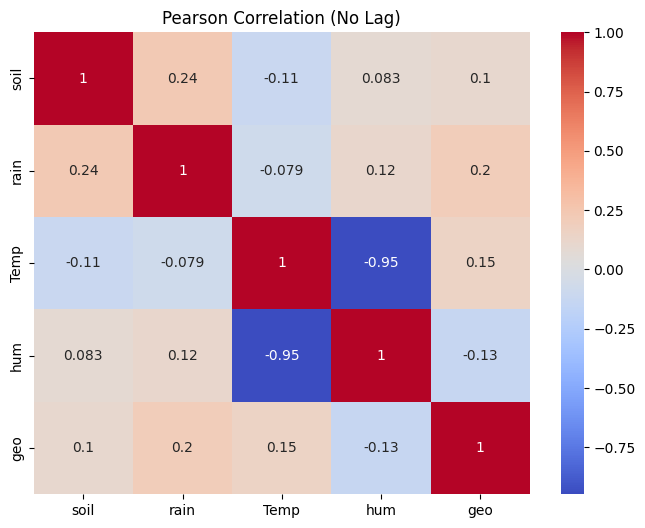

In [39]:
corr_matrix = df_val[feature_cols]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm')
plt.title("Pearson Correlation (No Lag)")
plt.show()

In [40]:
def lag_corr(x, y, max_lag=window_size*10):
    lags = []
    corrs = []
    for lag in range(-max_lag, max_lag + 1):
        if lag < 0:
            corr = np.corrcoef(x[:lag], y[-lag:])[0, 1]
        elif lag > 0:
            corr = np.corrcoef(x[lag:], y[:-lag])[0, 1]
        else:
            corr = np.corrcoef(x, y)[0, 1]
        lags.append(lag)
        corrs.append(corr)
    return lags, corrs


C:\Users\ahmad\AppData\Local\Temp\ipykernel_10040\1202832202.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = df_val['rain'].fillna(method='ffill').values
C:\Users\ahmad\AppData\Local\Temp\ipykernel_10040\1202832202.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df_val['soil'].fillna(method='ffill').values


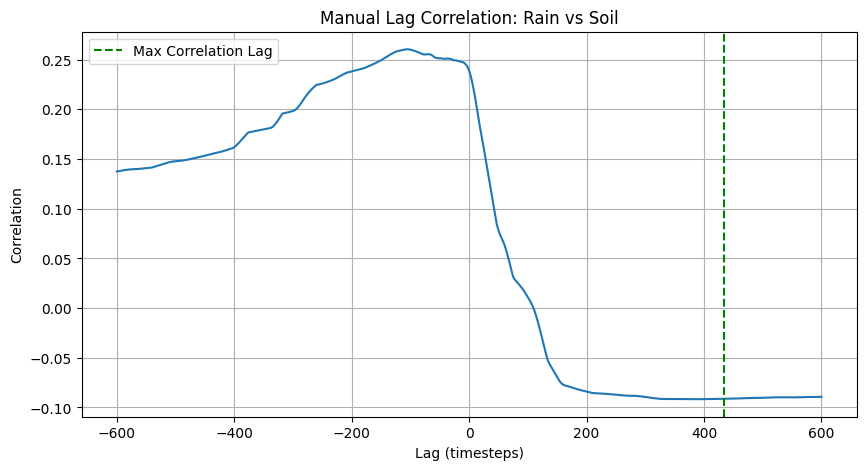

In [41]:
x = df_val['rain'].fillna(method='ffill').values
y = df_val['soil'].fillna(method='ffill').values
lags, corrs = lag_corr(x, y, max_lag=window_size*10)

plt.figure(figsize=(10, 5))
plt.plot(lags, corrs)
plt.axvline(x=np.argmax(corrs) - 60, color='green', linestyle='--', label='Max Correlation Lag')
plt.title("Manual Lag Correlation: Rain vs Soil")
plt.xlabel("Lag (timesteps)")
plt.ylabel("Correlation")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\ahmad\AppData\Local\Temp\ipykernel_10040\3179048846.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = df_val['rain'].fillna(method='ffill').values
C:\Users\ahmad\AppData\Local\Temp\ipykernel_10040\3179048846.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df_val['soil'].fillna(method='ffill').values


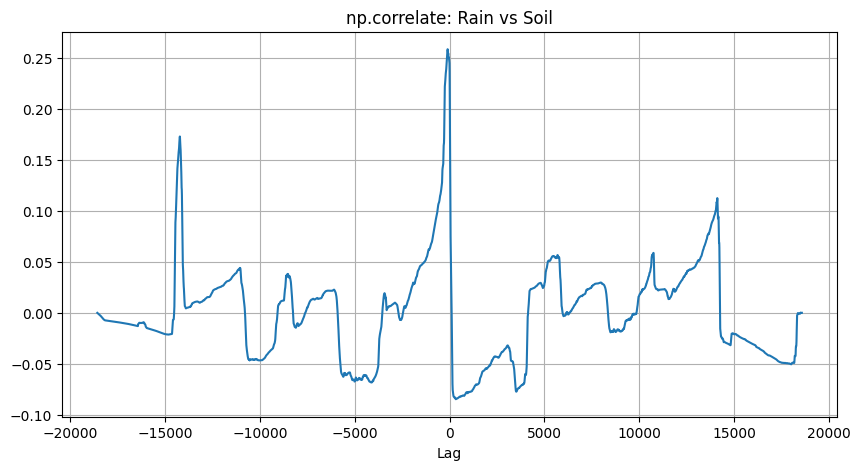

In [42]:
x = df_val['rain'].fillna(method='ffill').values
y = df_val['soil'].fillna(method='ffill').values

x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

corr = np.correlate(x, y, mode='full') / len(x)
lags = np.arange(-len(x)+1, len(x))

plt.figure(figsize=(10,5))
plt.plot(lags, corr)
plt.title("np.correlate: Rain vs Soil")
plt.xlabel("Lag")
plt.grid(True)
plt.show()


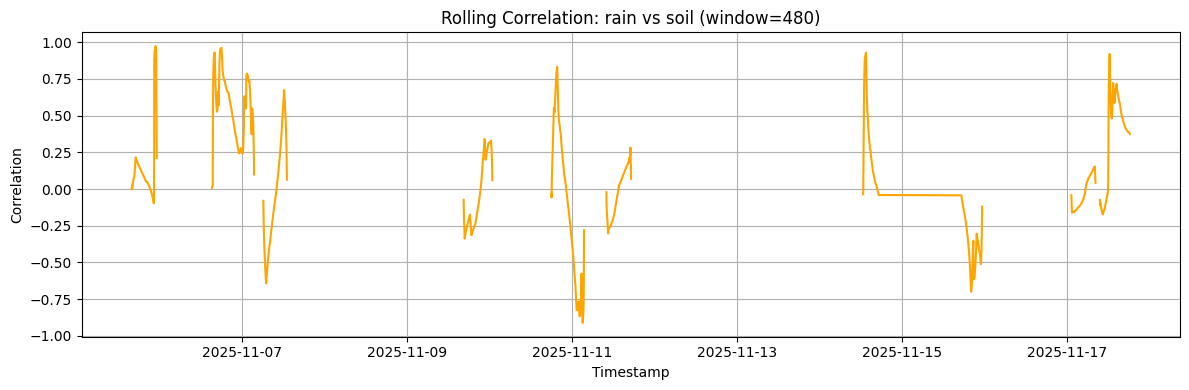

In [46]:
# ตัวอย่าง: ถ้า sampling ทุก 10 นาที → 48 จุด = 8 ชั่วโมง
df = df_val.copy()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

rolling_corr = df['rain'].rolling(window_size*8).corr(df['soil'])

plt.figure(figsize=(12, 4))
plt.plot(df['Timestamp'], rolling_corr, color='orange')
plt.title(f"Rolling Correlation: rain vs soil (window={window_size*8})")
plt.xlabel("Timestamp")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

## histogram

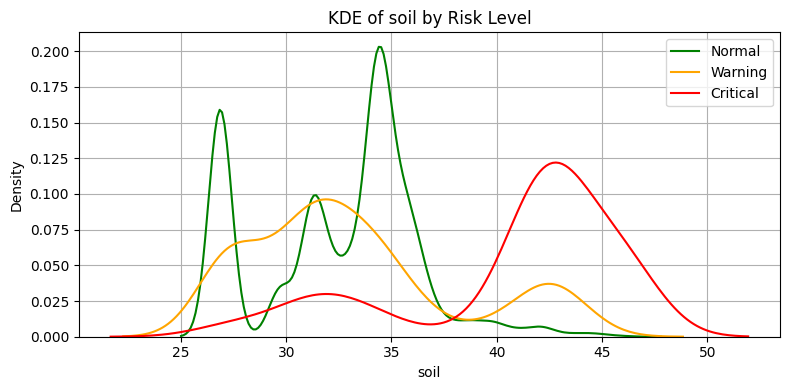

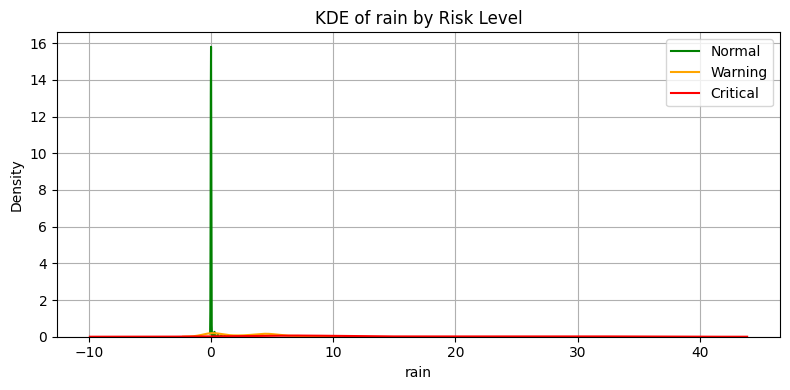

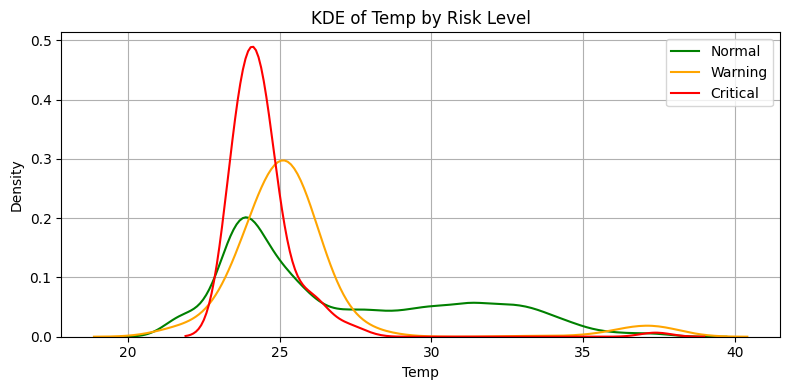

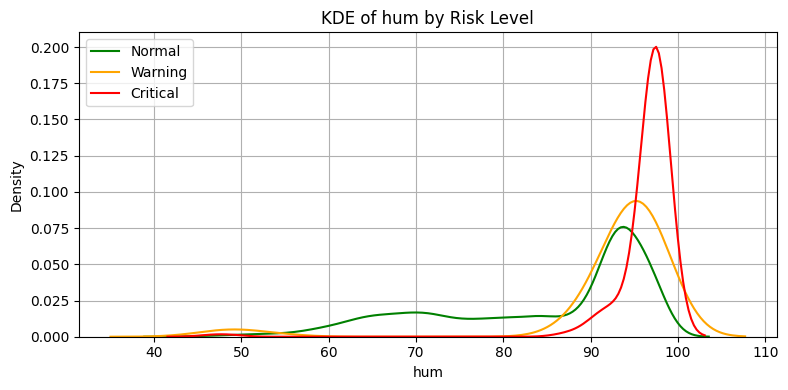

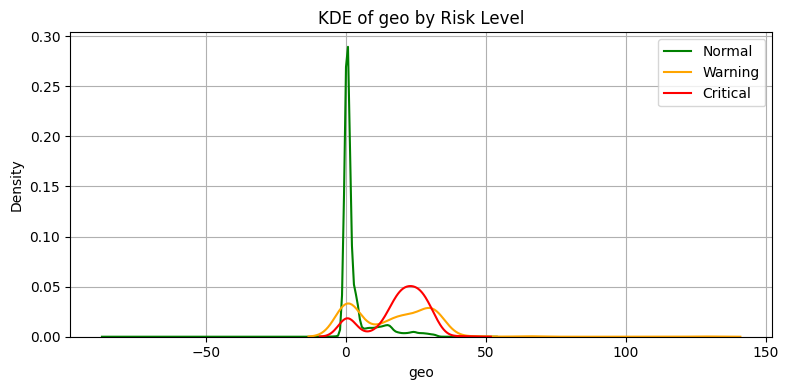

In [47]:
for col in feature_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_val[df_val['predicted_risk'] == 'Normal'][col], label='Normal', color='green')
    sns.kdeplot(df_val[df_val['predicted_risk'] == 'Warning'][col], label='Warning', color='orange')
    sns.kdeplot(df_val[df_val['predicted_risk'] == 'Critical'][col], label='Critical', color='red')
    plt.title(f"KDE of {col} by Risk Level")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Box Plot feature by risk

C:\Users\ahmad\AppData\Local\Temp\ipykernel_10040\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ahmad\AppData\Local\Temp\ipykernel_10040\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ahmad\AppData\Local\Temp\ipykernel_10040\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ahmad\AppData\Local\Temp\ipykernel_10040\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

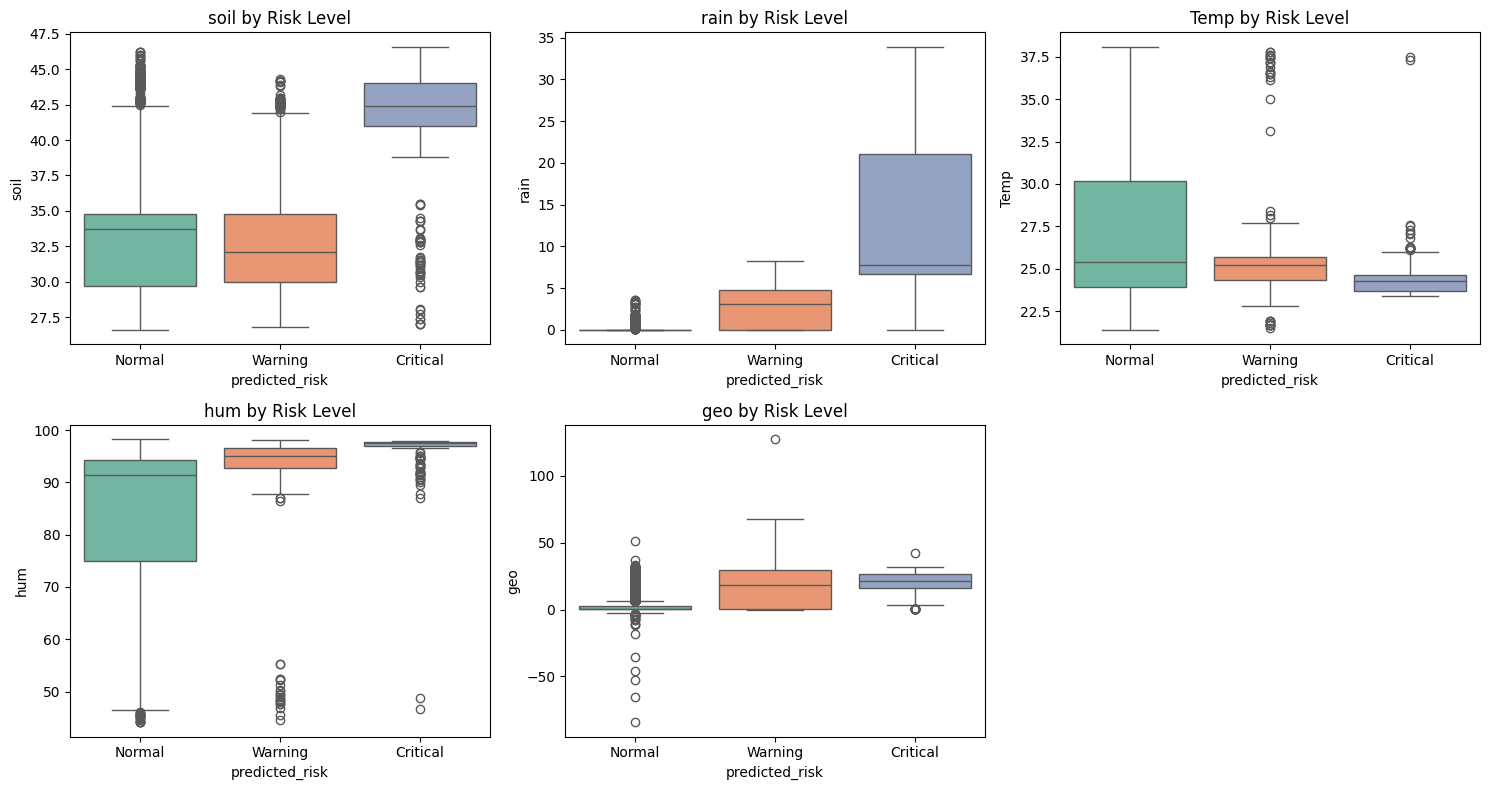

In [48]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(feature_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(
        x='predicted_risk',
        y=col,
        data=df_val,
        order=['Normal', 'Warning', 'Critical'],  # 🔧 fix order here
        palette='Set2'
    )
    plt.title(f'{col} by Risk Level')
plt.tight_layout()
plt.show()


## Time Series

In [52]:
df['Timestamp'].min()

Timestamp('2025-11-04 04:40:00')

In [53]:
df['Timestamp'].max()

Timestamp('2025-11-17 18:24:00')

In [54]:
if 'timestamp' in df_val.columns:
    df_val['timestamp'] = pd.to_datetime(df_val['timestamp'])
    df_val_sorted = df_val.sort_values('timestamp')

    plt.figure(figsize=(12,5))
    plt.plot(df_val_sorted['timestamp'], df_val_sorted['anomaly_score'], color='black', label='Anomaly Score')
    plt.axhline(warn_thresh, color='orange', linestyle='--', label='Warning')
    plt.axhline(crit_thresh, color='red', linestyle='--', label='Critical')
    plt.title('Anomaly Score over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

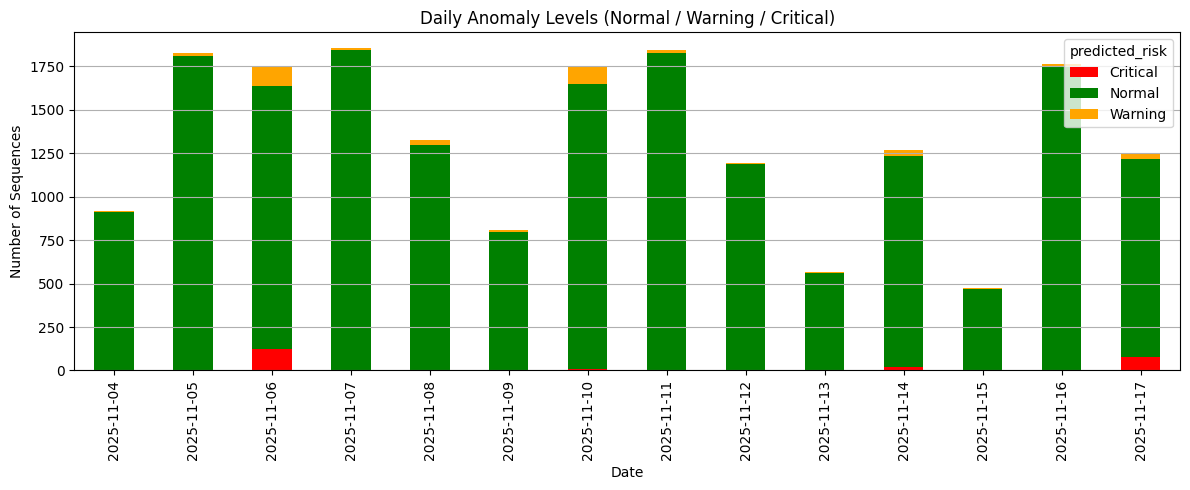

In [56]:

df_results = df_val
df_results['date'] = pd.to_datetime(df_results['Timestamp']).dt.date

risk_order = ['Critical', 'Normal', 'Warning']

alerts_per_day = df_results.groupby(['date', 'predicted_risk']).size().unstack(fill_value=0)

for risk in risk_order:
    if risk not in alerts_per_day.columns:
        alerts_per_day[risk] = 0

alerts_per_day = alerts_per_day[risk_order]

colors = ['red', 'green', 'orange']

alerts_per_day.plot(kind='bar', stacked=True, figsize=(12,5), color=colors)

plt.title("Daily Anomaly Levels (Normal / Warning / Critical)")
plt.xlabel("Date")
plt.ylabel("Number of Sequences")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


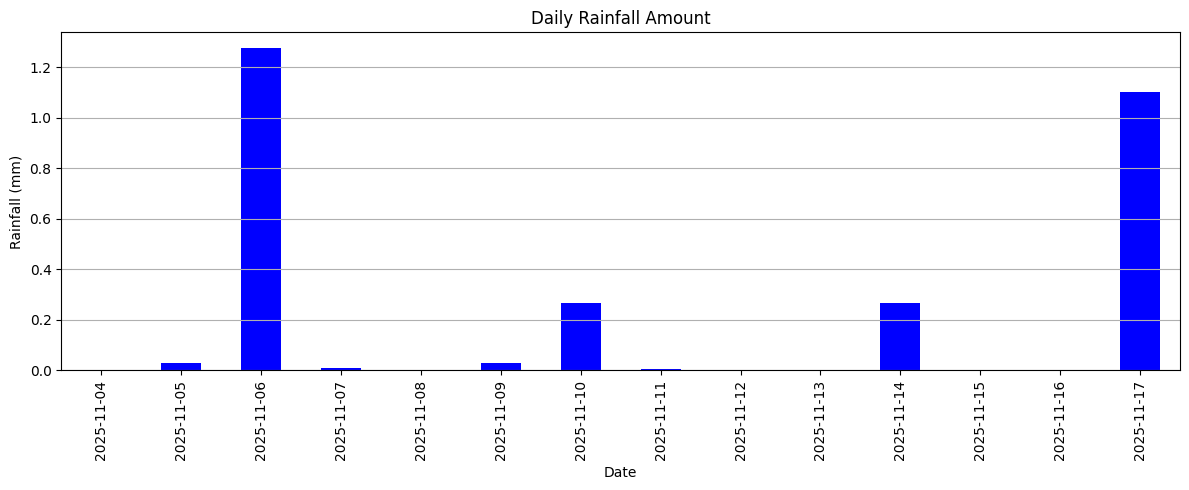

In [57]:

# สมมติ df_rain มี 'timestamp' และ 'rain_amount'

df_results['date'] = pd.to_datetime(df_results['Timestamp']).dt.date

# รวมปริมาณฝนรายวัน (sum)
rain_per_day = df_results.groupby('date')['rain'].mean()

# plot กราฟแท่งปริมาณฝนรายวัน
plt.figure(figsize=(12,5))
rain_per_day.plot(kind='bar', color='blue')

plt.title("Daily Rainfall Amount")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


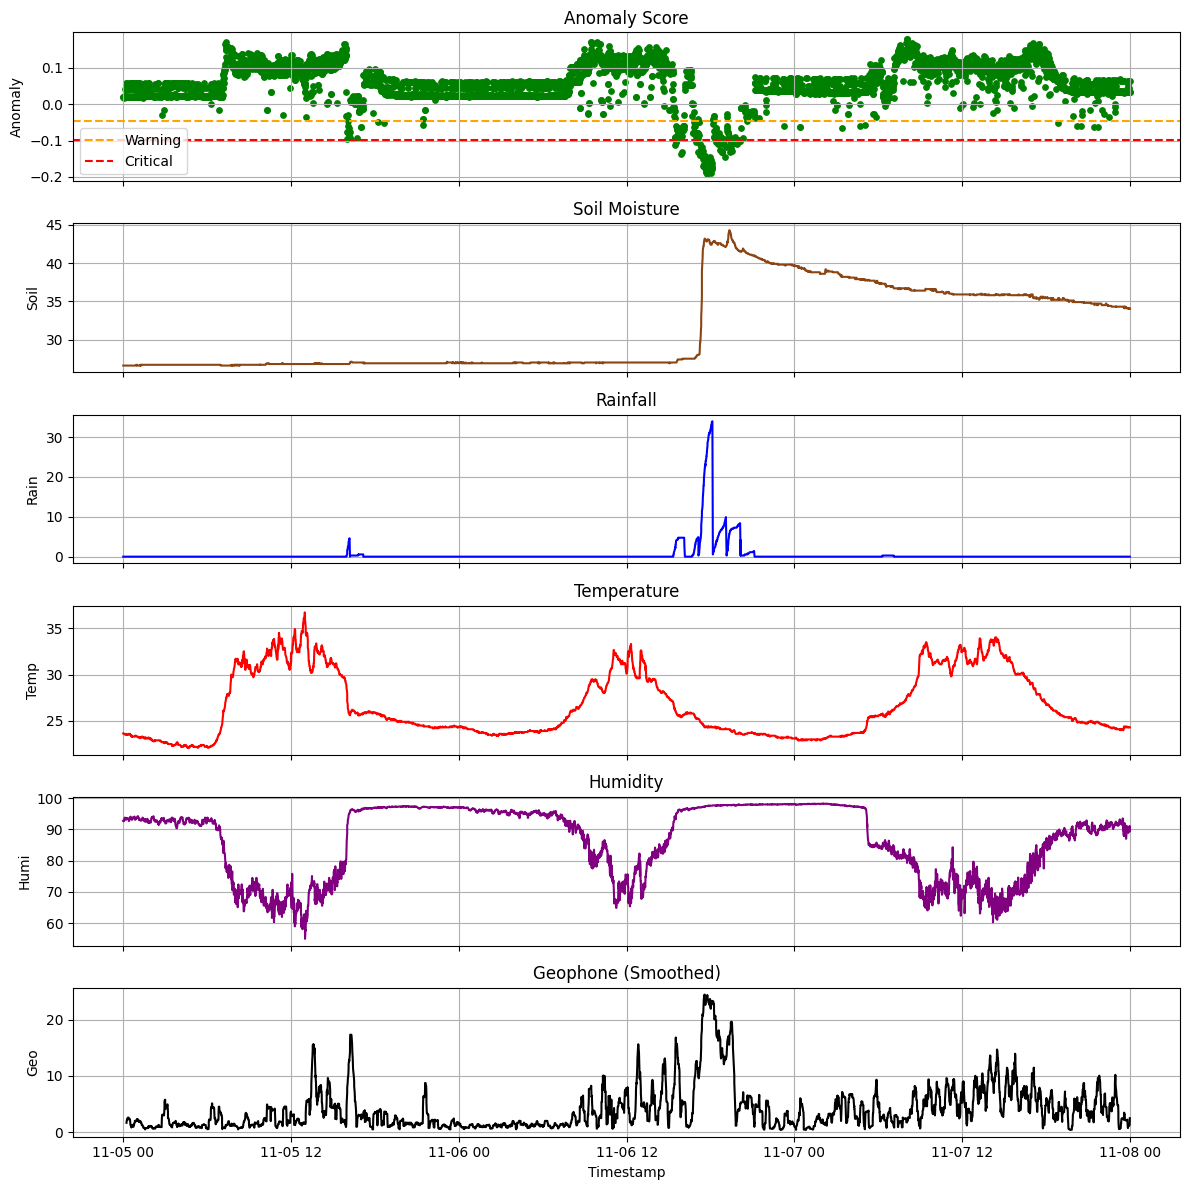

In [60]:
df_val['Timestamp'] = pd.to_datetime(df_val['Timestamp'])
df_dev = df_val.set_index('Timestamp').sort_index()
#df_dev = df_dev[df_dev['devID'] == 101.0] 
df_range = df_dev.loc["2025-11-05":"2025-11-07"]

# สร้าง subplot 6 แถว
fig, axs = plt.subplots(6, 1, figsize=(12, 12), sharex=True)

# Plot 1: Anomaly Score
axs[0].scatter(df_range.index, df_range['anomaly_score'], color='green', s=15)
axs[0].axhline(y=warn_thresh, color='orange', linestyle='--', label='Warning')
axs[0].axhline(y=crit_thresh, color='red', linestyle='--', label='Critical')
axs[0].set_ylabel("Anomaly")
axs[0].set_title("Anomaly Score")
axs[0].legend()
axs[0].grid(True)

# Plot 2: Soil
axs[1].plot(df_range.index, df_range['soil'], color='saddlebrown')
axs[1].set_ylabel("Soil")
axs[1].set_title("Soil Moisture")
axs[1].grid(True)

# Plot 3: Rain
axs[2].plot(df_range.index, df_range['rain'], color='blue')
axs[2].set_ylabel("Rain")
axs[2].set_title("Rainfall")
axs[2].grid(True)

# Plot 4: Temp
axs[3].plot(df_range.index, df_range['Temp'], color='red')
axs[3].set_ylabel("Temp")
axs[3].set_title("Temperature")
axs[3].grid(True)

# Plot 5: Humi
axs[4].plot(df_range.index, df_range['hum'], color='purple')
axs[4].set_ylabel("Humi")
axs[4].set_title("Humidity")
axs[4].grid(True)

window_size = 20  # ลองปรับค่าตามความเหมาะสม เช่น 10, 50, 100
smoothed_geo = df_range['geo'].rolling(window=window_size).mean()

axs[5].plot(df_range.index, smoothed_geo, color='black')
axs[5].set_ylabel("Geo")
axs[5].set_title("Geophone (Smoothed)")
axs[5].grid(True)

plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()


# F1-score

In [65]:
df_val["predicted_risk"].value_counts()

predicted_risk
Normal      17978
Warning       376
Critical      228
Name: count, dtype: int64

In [66]:
df_val["label"].value_counts()

label
warning     354
critical    124
Name: count, dtype: int64

In [68]:
import pandas as pd
from sklearn.metrics import f1_score, classification_report, confusion_matrix

df_val["label"] = df_val["label"].fillna("Normal")

# 1.2 ปรับข้อความให้เป็นตัวพิมพ์เล็กทั้งหมด (Lowercase) เพื่อให้เทียบกันได้
# เช่น 'Normal' จะตรงกับ 'normal', 'Warning' ตรงกับ 'warning'
df_val["predicted_risk"] = df_val["predicted_risk"].str.lower().str.strip()
df_val["label"] = df_val["label"].str.lower().str.strip()

# ---------------------------------------------------------
# 2. คำนวณ F1 Score
# ---------------------------------------------------------

y_true = df_val["label"]          # ค่าจริง
y_pred = df_val["predicted_risk"] # ค่าที่โมเดลทำนาย

# กำหนดลำดับ Class เพื่อให้แสดงผลสวยงาม (เรียงตามความรุนแรง)
target_names = ['normal', 'warning', 'critical']

print("------- Classification Report (F1 Score) -------")
# คำสั่งนี้จะคำนวณ Precision, Recall, และ F1-score ให้ครบทุก Class
print(classification_report(y_true, y_pred, labels=target_names))

print("\n------- Confusion Matrix -------")
# ดูว่าทำนายถูก/ผิด ไปตกที่ช่องไหนบ้าง
cm = confusion_matrix(y_true, y_pred, labels=target_names)
df_cm = pd.DataFrame(cm, index=[f"Actual {c}" for c in target_names], 
                         columns=[f"Pred {c}" for c in target_names])
print(df_cm)

# ---------------------------------------------------------
# 3. ถ้าต้องการค่า F1 Score ตัวเดียว (Macro หรือ Weighted)
# ---------------------------------------------------------
f1_macro = f1_score(y_true, y_pred, average='macro')
print(f"\nMacro F1 Score: {f1_macro:.4f}")

------- Classification Report (F1 Score) -------
              precision    recall  f1-score   support

      normal       0.99      0.98      0.98     18104
     warning       0.22      0.23      0.22       354
    critical       0.26      0.48      0.34       124

    accuracy                           0.96     18582
   macro avg       0.49      0.56      0.52     18582
weighted avg       0.97      0.96      0.97     18582


------- Confusion Matrix -------
                 Pred normal  Pred warning  Pred critical
Actual normal          17769           271             64
Actual warning           169            81            104
Actual critical           40            24             60

Macro F1 Score: 0.5159
